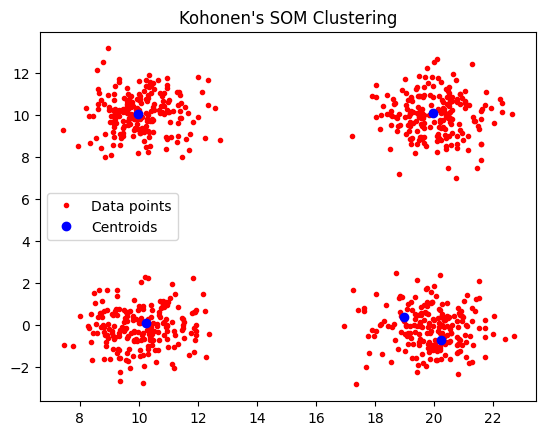

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(0)

# Create synthetic data clusters
numDataC = 200
cluster1 = 10 * np.array([np.ones(numDataC), np.zeros(numDataC)]) + np.random.randn(2, numDataC)
cluster2 = 20 * np.array([np.ones(numDataC), np.zeros(numDataC)]) + np.random.randn(2, numDataC)
cluster3 = 10 * np.array([np.ones(numDataC), np.ones(numDataC)]) + np.random.randn(2, numDataC)
cluster4 = np.array([20 * np.ones(numDataC), 10 * np.ones(numDataC)]) + np.random.randn(2, numDataC)
trainData = np.concatenate((cluster1, cluster2, cluster3, cluster4), axis=1)  # Combine all clusters into one dataset

# Initialize centroids for clustering
centroids = np.array([[14, 18, 14, 18, 18], [0, 0, 8, 8, 5]], dtype=np.float64)

# Parameters
epochs = 10  # Number of iterations for clustering
alpha = np.flip(np.linspace(0.1, 1, epochs))  # Decreasing learning rate

# Kohonen's clustering algorithm
for epoch in range(epochs):
    # For each data point
    for i in range(trainData.shape[1]):
        # Calculate distance between the data point and each centroid
        distances = np.sum((centroids - trainData[:, i, None])**2, axis=0)

        # Find the closest centroid
        closest_centroid_idx = np.argmin(distances)

        # Update the closest centroid towards the data point
        centroids[:, closest_centroid_idx] += alpha[epoch] * (trainData[:, i] - centroids[:, closest_centroid_idx])

# Plot the results
fig, ax = plt.subplots()
ax.plot(trainData[0, :], trainData[1, :], 'r.', linewidth=1.5, label="Data points")
ax.plot(centroids[0, :], centroids[1, :], 'bo', linewidth=1.5, label="Centroids")
ax.legend()
plt.title("Kohonen's SOM Clustering")
plt.show()
